In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/Conferences.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MGameCities.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MSeasons.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MSecondaryTourneyTeams.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/Cities.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MTeamSpellings.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonCompactResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MMasseyOrdinals.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MSecondaryTourneyCompactResults.csv
/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourne

In [2]:
# Basic data
team = pd.read_csv("/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MTeams.csv")
seasons = pd.read_csv("/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MSeasons.csv")
seeds = pd.read_csv("/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeeds.csv")
season_results = pd.read_csv("/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonCompactResults.csv")
tour_results = pd.read_csv("/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")


City data
Shape: (463, 3)
Coloumsn Index(['CityID', 'City', 'State'], dtype='object')
Cites length: 435
States: 63


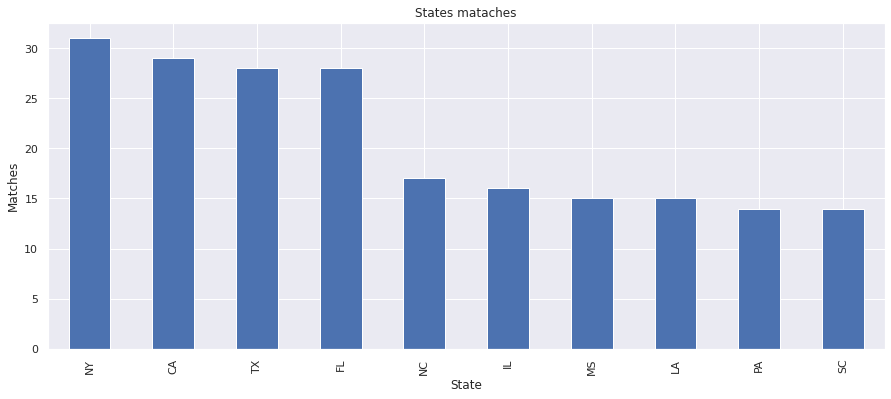

In [3]:
city = pd.read_csv("/kaggle/input/mens-march-mania-2022/MDataFiles_Stage1/Cities.csv")
print("City data")
print("Shape:",np.shape(city))
print("Coloumsn",city.columns)
print("Cites length:", len(np.unique(city["City"])))
print("States:",len(np.unique(city["State"])))
plt.figure(figsize=(15,6))
ax = city["State"].value_counts().head(10).plot(kind="bar",title="States mataches")
ax.set_xlabel("State")
ax.set_ylabel("Matches")

plt.show()

In [4]:
print("Number of teams: ",len(np.unique(team["TeamName"])))

Number of teams:  372


In [5]:
team.head(5)

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022


In [6]:
seasons["DayZero"] = pd.to_datetime(seasons["DayZero"])
seasons.head(5)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,1984-10-29,East,West,Midwest,Southeast
1,1986,1985-10-28,East,Midwest,Southeast,West
2,1987,1986-10-27,East,Southeast,Midwest,West
3,1988,1987-11-02,East,Midwest,Southeast,West
4,1989,1988-10-31,East,West,Midwest,Southeast


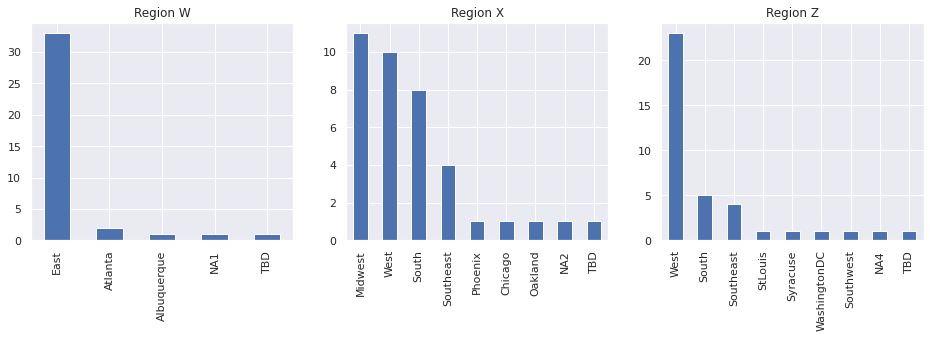

In [7]:
plt.figure(figsize=(16,4))
plt.subplot(131)
seasons["RegionW"].value_counts().plot(kind="bar",title="Region W")

plt.subplot(132)
seasons["RegionX"].value_counts().plot(kind="bar",title="Region X")

plt.subplot(133)
seasons["RegionZ"].value_counts().plot(kind="bar",title="Region Z")
plt.show()

In [8]:
seeds.head()


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [9]:
print(seeds.shape)

(2354, 3)


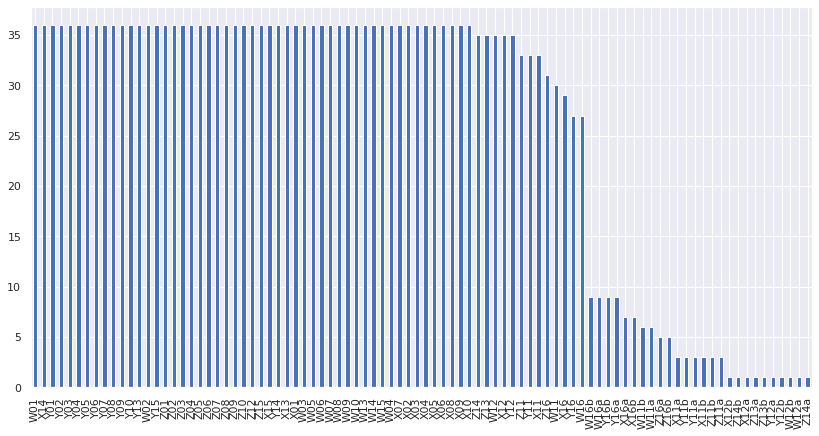

In [10]:
seeds["Seed"].value_counts().plot(kind='bar',figsize=(14,7))
plt.show()

In [11]:
season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [12]:
season_results.query("Season == 1987")

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
7520,1987,25,1272,70,1156,66,H,0
7521,1987,25,1276,115,1133,107,H,0
7522,1987,25,1328,119,1140,110,H,0
7523,1987,25,1395,83,1261,74,A,0
7524,1987,25,1396,79,1438,75,A,0
...,...,...,...,...,...,...,...,...
11430,1987,132,1272,75,1257,52,A,0
11431,1987,132,1281,67,1242,65,N,0
11432,1987,132,1301,68,1314,67,N,0
11433,1987,132,1417,76,1449,64,H,0


# Find the number of matches in each season 

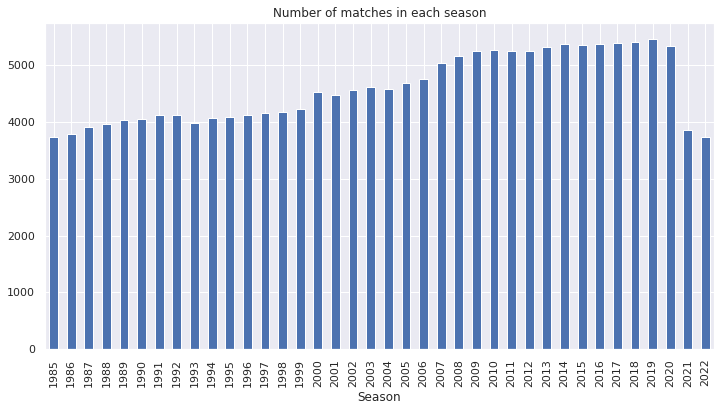

In [13]:
season_results.groupby("Season").count()['DayNum'].plot(kind='bar',figsize=(12,6),title="Number of matches in each season")
plt.show()

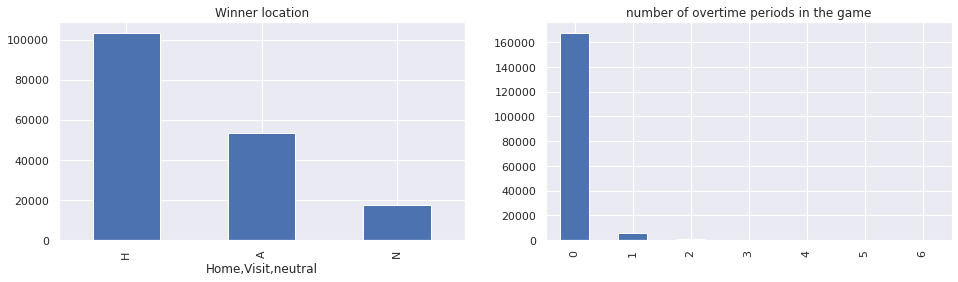

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(121)
ax = season_results['WLoc'].value_counts().plot(kind='bar',title="Winner location")
ax.set_xlabel("Home,Visit,neutral")
plt.subplot(122)
ax = season_results["NumOT"].value_counts().plot(kind='bar',title="number of overtime periods in the game")
plt.show()

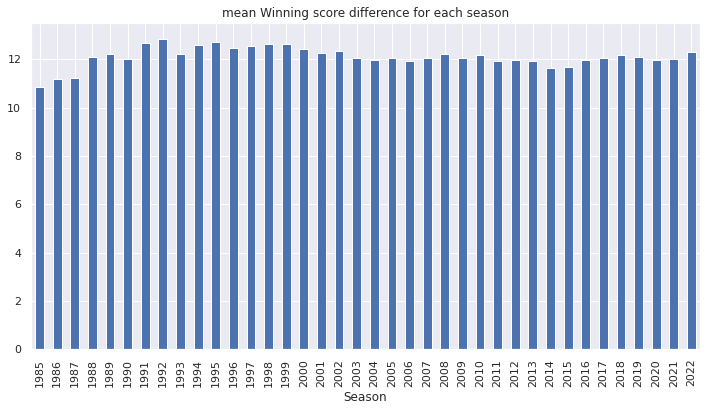

In [15]:
df = season_results.copy()
df["Winning_difference"] = df["WScore"] - df["LScore"]
df.groupby("Season").mean()["Winning_difference"].plot(kind='bar',figsize=(12,6),title='mean Winning score difference for each season')
plt.show()

In [16]:
tour_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


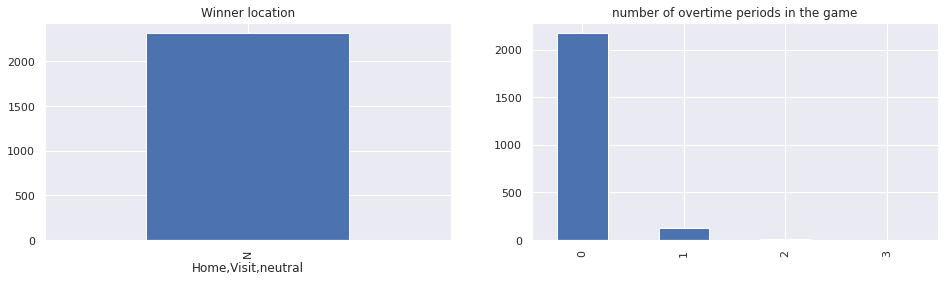

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(121)
ax = tour_results['WLoc'].value_counts().plot(kind='bar',title="Winner location")
ax.set_xlabel("Home,Visit,neutral")
plt.subplot(122)
ax = tour_results["NumOT"].value_counts().plot(kind='bar',title="number of overtime periods in the game")
plt.show()

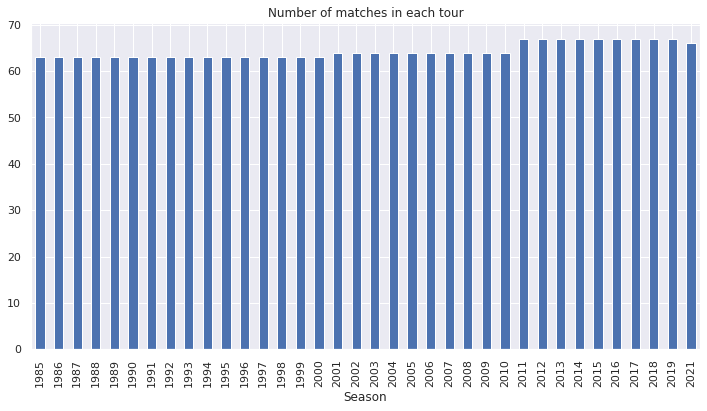

In [18]:
tour_results.groupby("Season").count()['DayNum'].plot(kind='bar',figsize=(12,6),title="Number of matches in each tour")
plt.show()

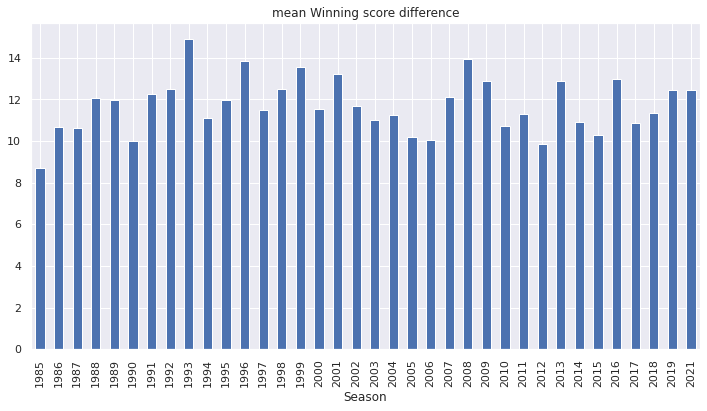

In [19]:
df = tour_results.copy()
df["Winning_difference"] = tour_results["WScore"] - tour_results["LScore"]
df.groupby("Season").mean()["Winning_difference"].plot(kind='bar',figsize=(12,6),title='mean Winning score difference')
plt.show()

In [20]:
season_results["WTeamID"].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 1181    958
1242    949
1246    898
1314    887
1112    878
       ... 
1471     12
1289      6
1118      6
1472      5
1327      3
Name: WTeamID, Length: 372, dtype: int64>